## Machine Learning - Linear Regression with 1 variable(feature)

In [1]:
import pandas as pd #supports reading files from csv files,..
import numpy as np #supports math functions, matrix algebra calculations
import matplotlib.pyplot as plt #supports plotting
from sklearn import linear_model #works with regression algorithms and some other linear models.
from sklearn.metrics import mean_squared_error

In [2]:
data_frame = pd.read_csv("HousePrice.csv")
data_frame

,area,price
0,2700,560000
1,2800,570000
2,3000,600000
3,3100,610000
4,3200,635000
5,3400,700000
6,3500,730000
7,3700,800000
8,3800,812000
9,4100,901000


In [3]:
#this is input (feature)
data_frame.area
#this is output (label)
data_frame.price

0    560000
1    570000
2    600000
3    610000
4    635000
5    700000
6    730000
7    800000
8    812000
9    901000
Name: price, dtype: int64

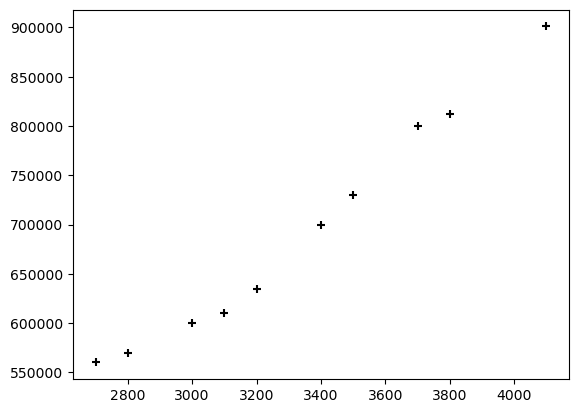

In [4]:
#vẽ biểu đồ phân tán (scatter plot) _ trực quan hóa mối quan hệ giữa hai biến số lượng (số học).
plt.scatter(data_frame.area,data_frame.price, color = 'black', marker='+') 

In [5]:
#tạo một mô hình hồi quy tuyến tính (Linear Regression)
linear_regression = linear_model.LinearRegression() #
#train the model 
#Lý do phải là 2D: vì sklearn yêu cầu đầu vào có thể mở rộng nhiều cột (nhiều biến đầu vào).
linear_regression.fit(data_frame[['area']], data_frame['price']) # fit chứa 2 tham số, input là ma trận 2 chiều bởi vì ta có thể có nhiều feature  
# fit nó học ra các hệ số (slope, intercept) sao cho mô hình dự đoán tốt nhất đầu ra y từ đầu vào X.

LinearRegression()

In [6]:
#dự doán
linear_regression.predict([[3300]])

/home/chinhbean/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([684161.32536665])

In [7]:
#Simple linear regression: y = m*x + b 
# y: Giá trị đầu ra (label)
# x: Giá trị đầu vào (feature).
# m: Độ dốc (slope) của đường thẳng
# b: Giao điểm với trục tung (intercept)
m = linear_regression.coef_
m # độ dóc là ma trận cột => vector(array)

array([254.62248778])

In [8]:
b = linear_regression.intercept_
b 

np.float64(-156092.8843020096)

In [9]:
 y_predict = m * 3300 + b #tức là khi thực hiện prediction thì chương trình của ta sẽ tính toán ra đường hồi quy tuyến tính này và nó sẽ đưa giá trị x lên đường đó và tính ra y 
 y_predict

array([684161.32536665])

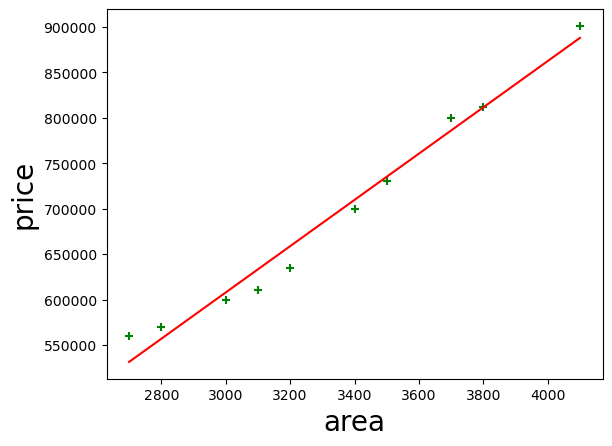

In [10]:
plt.xlabel('area', fontsize = 20) # trục hoành 
plt.ylabel('price', fontsize = 20) # trục tung (là giá trị ta cần dự đoán)
plt.scatter(data_frame.area,data_frame.price, color = 'green', marker='+')  #scatter: vẽ các điểm dữ liệu thực tế (training data)
#sau khi có các điểm mẫu green bằng scatter và và đã huấn luyện mô hình hồi quy tuyến tính ta có thể vẽ đường dự đoán (đường hồi quy)
plt.plot(data_frame['area'], m * data_frame['area'] + b, color='red')

/home/chinhbean/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


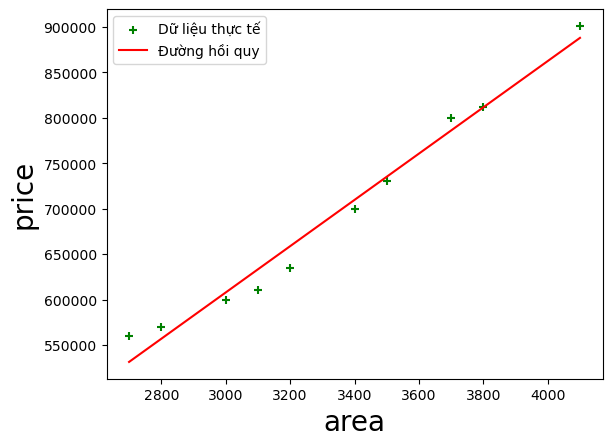

Mean Squared Error: 264076262.90059733


In [14]:
X = data_frame['area'].values.reshape(-1, 1)  # Feature (mảng 2 chiều)
# Dự đoán cho toàn bộ tập dữ liệu
linear_regression = linear_model.LinearRegression() #
linear_regression.fit(data_frame[['area']], data_frame['price'])
y_pred = linear_regression.predict(X)  # Dự đoán cho tất cả giá trị trong X (10 mẫu)
# Vẽ đồ thị
plt.xlabel('area', fontsize=20)  # Trục hoành
plt.ylabel('price', fontsize=20)  # Trục tung
plt.scatter(data_frame['area'], data_frame['price'], color='green', marker='+', label='Dữ liệu thực tế')
plt.plot(data_frame['area'], m * data_frame['area'] + b, color='red', label='Đường hồi quy')
plt.legend()
plt.show()

# Tính MSE
mse = mean_squared_error(data_frame['price'], y_pred)
print("Mean Squared Error:", mse)

In [23]:
##Cricket Chirps vs Temperature
cricket_data = pd.read_csv('ChirpsPerMinute.csv')
cricket_data
print("\nColumns:", cricket_data.columns)



Columns: Index(['Cricket chirps per Minute ', 'Temperature'], dtype='object')


In [28]:
# Train linear regression model
lin_reg2 = linear_model.LinearRegression()
lin_reg2.fit(cricket_data[['Cricket chirps per Minute ']], cricket_data['Temperature'])


LinearRegression()

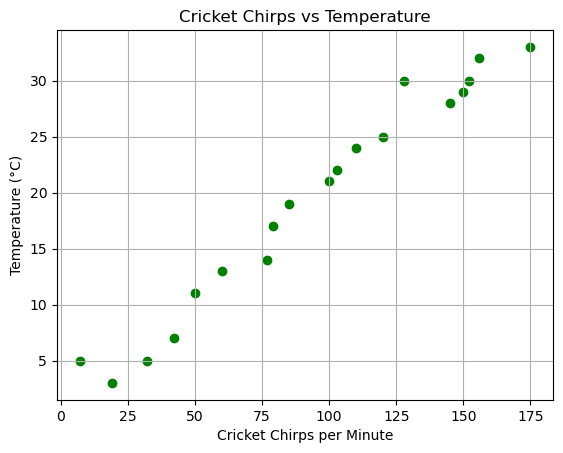

In [29]:
# Visualize data
plt.scatter(cricket_data[['Cricket chirps per Minute ']], cricket_data['Temperature'], color='green')
plt.title('Cricket Chirps vs Temperature')
plt.xlabel("Cricket Chirps per Minute")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


In [34]:
# Make prediction
temp_prediction = lin_reg2.predict([[70]])
temp_prediction

/home/chinhbean/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.63482284])

In [36]:
# Get parameters
m2 = lin_reg2.coef_[0]
b2 = lin_reg2.intercept_
print(f"Slope (m2): {m2:.6f}")
print(f"Intercept (b2): {b2:.6f}")
# Fix 6: Correct manual calculation
manual_temp_prediction = m2 * 70 + b2
print(f"Manual prediction for 70 chirps/min: {manual_temp_prediction:.2f}°C")



Slope (m2): 0.195518
Intercept (b2): 0.948550
Manual prediction for 70 chirps/min: 14.63°C


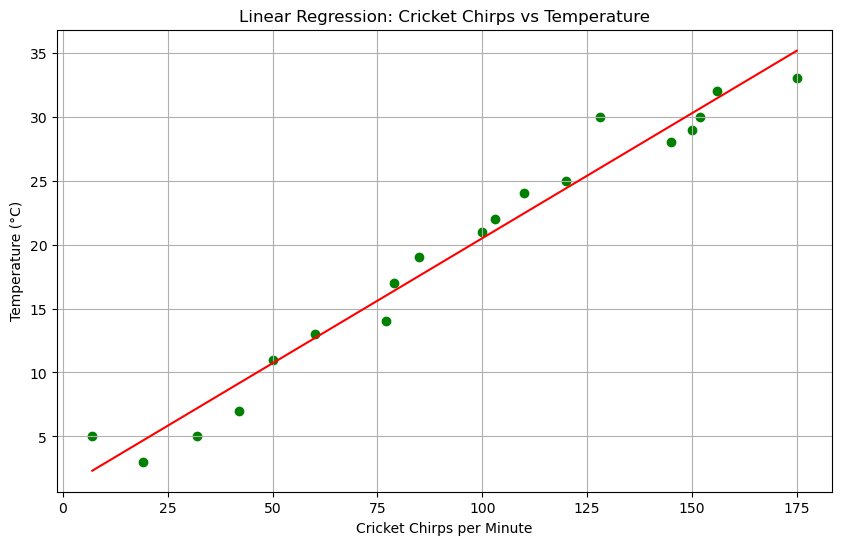

In [38]:
# Plot regression line
chirps_col = 'Cricket chirps per Minute '
chirps = cricket_data[chirps_col]
plt.figure(figsize=(10, 6))
plt.scatter(chirps, cricket_data['Temperature'], color='green')
plt.plot(chirps, m2 * chirps + b2, color='red')
plt.title('Linear Regression: Cricket Chirps vs Temperature')
plt.xlabel("Cricket Chirps per Minute")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()
